<a href="https://colab.research.google.com/github/uchibe/BIAI/blob/develop/notebooks/Cliff_environment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import convolve
import matplotlib.pyplot as plt
import gym
%matplotlib inline

In [ ]:
def epsilon_greedy_policy(Q, epsilon=0.1):
    """
    Epsilon greedy policy
    """
    n_actions = Q.shape[0]
    policy = epsilon/n_actions*np.ones(n_actions)
    policy[Q.argmax(0)] += 1 - epsilon

    return policy


def sample_epsilon_greedy(Q, epsilon=0.1):
    """
    Sample an action from an epsilon greedy policy
    """
    n_actions = Q.shape[0]
    prob = epsilon_greedy_policy(Q, epsilon)
    return np.random.choice(n_actions, p=prob)

## Value-based update rules
When $s_t$ is a terminal state, the TD error is computed by
\begin{equation*}
  \delta = r_t - Q(s_p, a_p)
\end{equation*}
Otherwise, the TD error is computed by
\begin{equation*}
  \delta = 
\end{equation*}

In [ ]:
GAMMA = 1.0
def calc_TD(method, Q, s_p, a_p, r_t, s_t, a_t, is_terminal):
    if is_terminal:
        td_error = r_t - Q[s_p, a_p]
    elif method == 'qlearn':
        td_error = r_t + GAMMA*np.max(Q[s_t, :]) - Q[s_p, a_p]
    elif method == 'sarsa':
        td_error = r_t + GAMMA*Q[s_t, a_t] - Q[s_p, a_p]
    elif method == 'expsarsa':
        prob = epsilon_greedy_policy(Q[s_t, :], epsilon=EPSILON)
        Q_s_t = np.dot(prob, Q[s_t, :])
        td_error = r_t + GAMMA*Q_s_t - Q[s_p, a_p]
    else:
        td_error = r_t + GAMMA*np.max(Q[s_t, :]) - Q[s_p, a_p]

    return td_error

In [ ]:
NUM_EPISODES = 1000
ALPHA = 0.2
EPSILON = 0.1

def run(method):
    env = gym.make('CliffWalking-v0')

    # state-action value function
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    total_reward = np.zeros(NUM_EPISODES)

    for episode in range(NUM_EPISODES):
        s_p, is_terminal = env.reset(), False
        a_p = sample_epsilon_greedy(Q[s_p, :], epsilon=EPSILON)

        while not is_terminal:
            s_t, r_t, is_terminal, _ = env.step(a_p)
            a_t = sample_epsilon_greedy(Q[s_t, :], epsilon=EPSILON)

            td_error = calc_TD(method, Q, s_p, a_p, r_t, s_t, a_t, is_terminal)
            Q[s_p, a_p] += ALPHA*td_error

            s_p, a_p = s_t, a_t

            total_reward[episode] += r_t
            # if episode == NUM_EPISODES-1:
            #     env.render()

    return Q, total_reward

In [ ]:
def plot_rewards(r_qlearn, r_sarsa, r_exp):
    plt.plot(np.mean(r_qlearn, axis=0), label='Q learning')
    plt.plot(np.mean(r_sarsa, axis=0), label='SARSA')
    plt.plot(np.mean(r_exp, axis=0), label='Expected SARSA')

    plt.legend()
    plt.xlabel('episodes')
    plt.ylabel('sum of rewards')
    axes = plt.gca()
    axes.set_ylim([-100, 0])

    plt.show()

In [ ]:
NUM_RUNS = 10

r_qlearn = np.zeros((NUM_RUNS, NUM_EPISODES))
r_sarsa = np.zeros((NUM_RUNS, NUM_EPISODES))
r_exp = np.zeros((NUM_RUNS, NUM_EPISODES))
for r in range(NUM_RUNS):
    q_qlearn, r_qlearn[r, :] = run('qlearn')
    q_sarsa, r_sarsa[r, :] = run('sarsa')
    q_expsarsa, r_exp[r, :] = run('expsarsa')



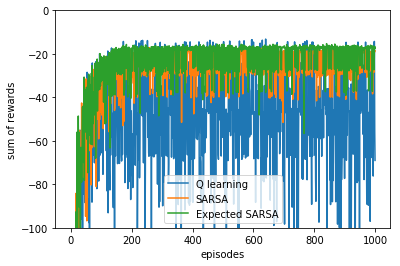

In [ ]:
plot_rewards(r_qlearn, r_sarsa, r_exp)

In [ ]:
def evaluate(Q):
    env = gym.make('CliffWalking-v0')

    s_p, is_terminal = env.reset(), False
    a_p = sample_epsilon_greedy(Q[s_p, :], epsilon=0) # select the optimal action

    while not is_terminal:
        s_t, r_t, is_terminal, _ = env.step(a_p)
        a_t = sample_epsilon_greedy(Q[s_t, :], epsilon=0)
        s_p, a_p = s_t, a_t
        env.render()


In [ ]:
evaluate(q_qlearn)

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  x  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  x  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o